### Hugging Face Transformers: Images ###

In [1]:
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import requests
import soundfile as sf

# PyTorch packages
import torch
import torch.nn as nn

# Hugging Face
import transformers
from transformers import pipeline
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import set_seed
from datasets import load_dataset

# Appearance of the Notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=110)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Import this module with autoreload
%load_ext autoreload
%autoreload 2
import nlptools as nlpt
from nlptools.fileutils import FileOP
from nlptools.imageproc import ImageData
print(f'NLP Tools package version:  {nlpt.__version__}')
print(f'PyTorch version:            {torch.__version__}')

NLP Tools package version:  0.0.post1.dev42+ga7dec38
PyTorch version:            2.6.0a0+df5bbc09d1.nv24.11


In [2]:
# GPU checks
is_cuda = torch.cuda.is_available()
print(f'CUDA available: {is_cuda}')
print(f'Number of GPUs found:  {torch.cuda.device_count()}')

if is_cuda:
    print(f'Current device ID:     {torch.cuda.current_device()}')
    print(f'GPU device name:       {torch.cuda.get_device_name(0)}')
    print(f'CUDNN version:         {torch.backends.cudnn.version()}')
    device_str = 'cuda:0'
    torch.cuda.empty_cache() 
else:
    device_str = 'cpu'
device = torch.device(device_str)
print()
print(f'Device for model training/inference: {device}')

CUDA available: True
Number of GPUs found:  1
Current device ID:     0
GPU device name:       NVIDIA GeForce RTX 3070 Laptop GPU
CUDNN version:         90501

Device for model training/inference: cuda:0


In [3]:
# Directories and files
data_dir = os.path.join(os.environ.get('HOME'), 'data')
diskdata_dir = os.path.join(os.environ.get('HOME'), 'diskdata', 'udemy')

### Image classification ###

In [4]:
# Get a data set from HuggingFace
dataset_name = 'Matias12f/cats_and_dogs'
ds = load_dataset(path=dataset_name, split='test')
print(len(ds))

Resolving data files:   0%|          | 0/176 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

24


(160, 220, 3)


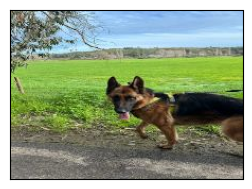

In [6]:
# Load an image
idx = 20
im = np.array(ds[idx].get('image'))
print(im.shape)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(im)
ax.set(xticks=[], yticks=[])
plt.show()

# Convert numpy array to PIL image
pil_im = Image.fromarray(im)

In [7]:
# Image classifier
classifier = pipeline(task='image-classification')

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


In [8]:
outputs = classifier(pil_im)
display(outputs)

[{'label': 'German shepherd, German shepherd dog, German police dog, alsatian',
  'score': 0.9303937554359436},
 {'label': 'malinois', 'score': 0.04914480075240135},
 {'label': 'kelpie', 'score': 0.007069488056004047},
 {'label': 'muzzle', 'score': 0.0012694563483819366},
 {'label': 'bulletproof vest', 'score': 0.0010636907536536455}]

### Facial emotion recognition ###

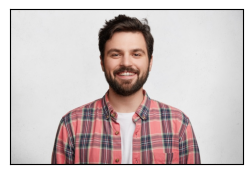

Device set to use cuda:0


In [9]:
# Random image from the internet
lnk = 'https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg'
# lnk = 'https://t3.ftcdn.net/jpg/08/84/49/38/360_F_884493810_1KoCY5p0QoLFSZZj90A7jERTlBxdRYbK.jpg'
pil_im = Image.open(requests.get(lnk, stream=True).raw)
im = np.array(pil_im)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(im)
ax.set(xticks=[], yticks=[])
plt.show()
# Image classifier
classifier = pipeline(task='image-classification', model='Rajaram1996/FacialEmoRecog')

In [10]:
outputs = classifier(pil_im)
display(outputs)

[{'label': 'happy', 'score': 0.16369330883026123},
 {'label': 'disgust', 'score': 0.14276355504989624},
 {'label': 'surprise', 'score': 0.13045711815357208},
 {'label': 'fear', 'score': 0.11721432209014893},
 {'label': 'sadness', 'score': 0.11716016381978989}]

In [11]:
# Age classification 
model_name = 'nateraw/vit-age-classifier'
# Image classifier
classifier = pipeline(task='image-classification', model=model_name)
# Classify image
outputs = classifier(pil_im)
display(outputs)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


[{'label': '30-39', 'score': 0.5545845627784729},
 {'label': '20-29', 'score': 0.39216047525405884},
 {'label': '40-49', 'score': 0.050568852573633194},
 {'label': '10-19', 'score': 0.0014980024425312877},
 {'label': '50-59', 'score': 0.0009428389021195471}]

### Image segmentation ###

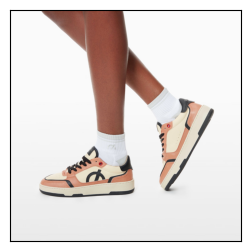

In [11]:
# lnk = 'https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg'
# lnk = 'https://taftclothing.com/cdn/shop/files/BT-ROME-OXBLOD_MTAFT.jpg?v=1725377753&width=1000'
lnk = 'https://www.lociwear.de/cdn/shop/files/LC-004-008.jpg?v=1712327587&width=2000'
pil_im = Image.open(requests.get(lnk, stream=True).raw)
im = np.array(pil_im)
fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(im)
ax.set(xticks=[], yticks=[])
plt.show()

In [12]:
model_name = 'mattmdjaga/segformer_b2_clothes'
segmenter = pipeline('image-segmentation', model=model_name)

Device set to use cuda:0


In [13]:
outputs = segmenter(pil_im)
display(outputs)

[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=2000x2000>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=2000x2000>},
 {'score': None,
  'label': 'Pants',
  'mask': <PIL.Image.Image image mode=L size=2000x2000>},
 {'score': None,
  'label': 'Left-shoe',
  'mask': <PIL.Image.Image image mode=L size=2000x2000>},
 {'score': None,
  'label': 'Right-shoe',
  'mask': <PIL.Image.Image image mode=L size=2000x2000>},
 {'score': None,
  'label': 'Left-leg',
  'mask': <PIL.Image.Image image mode=L size=2000x2000>},
 {'score': None,
  'label': 'Right-leg',
  'mask': <PIL.Image.Image image mode=L size=2000x2000>},
 {'score': None,
  'label': 'Bag',
  'mask': <PIL.Image.Image image mode=L size=2000x2000>}]

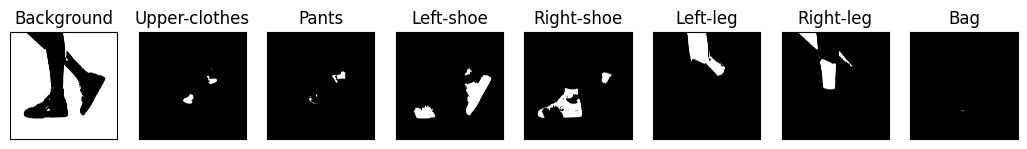

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=len(outputs), figsize=(13, 4))
for i, output_dict in enumerate(outputs):
    mask = output_dict.get('mask')
    label= output_dict.get('label')
    mask_array = np.array(mask)
    ax[i].imshow(mask_array, cmap='grey')
    ax[i].set(xticks=[], yticks=[], title=label)
plt.show()

### Text to speech ###

In [15]:
print(transformers.__version__)

4.47.1


In [16]:
text = """ 
In December, Sam Altman, OpenAI’s chief executive, donated $1 million to President-elect Donald J. Trump’s inaugural fund, 
joining a number of other tech executives who are working to improve their relationships with Mr. Trump.
"""
synth = pipeline("text-to-speech")

No model was supplied, defaulted to suno/bark-small and revision 1dbd7a1 (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
Device set to use cuda:0


In [17]:
speech = synth(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [18]:
speech

{'audio': array([[-0.0035632 , -0.00303244, -0.00288151, ...,  0.04039511,  0.12130487,  0.14013046]], dtype=float32),
 'sampling_rate': 24000}

In [20]:
soundfile = os.path.join(diskdata_dir, 'speech.wav')
sf.write(file=soundfile, 
         data=speech.get('audio').T, 
         samplerate=speech.get('sampling_rate'))